In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.model_v1 import TDConway
import torch
from lib.testing_utilities import get_num_params, boards, visualize_state
from lib.utilities import config, product
import matplotlib.pyplot as plt
%matplotlib inline
plt.ioff()

In [3]:
get_num_params(TDConway(config))

59,943,809 parameters


In [4]:
boards = torch.stack(boards)
boards.shape

torch.Size([50, 2, 15, 19])

In [5]:
td_conway = TDConway(config)

In [6]:
%%timeit
with torch.no_grad():
  td_conway(boards)

1.53 s ± 479 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
with torch.no_grad():
  res = td_conway(boards)
res

(tensor(0.3986), tensor(34))

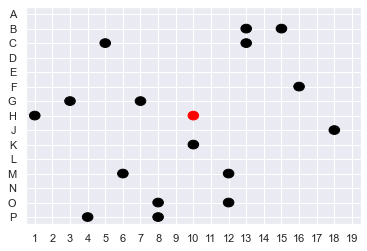

In [8]:
visualize_state(boards[16])

In [9]:
with torch.no_grad():
  res = td_conway(boards, get_all_values = True)
res

tensor([0.4715, 0.4949, 0.5063, 0.5655, 0.5347, 0.5473, 0.5190, 0.5211, 0.5446,
        0.5846, 0.4581, 0.5378, 0.5913, 0.5292, 0.5132, 0.5198, 0.5355, 0.5608,
        0.5253, 0.5205, 0.4732, 0.5037, 0.5203, 0.4557, 0.5645, 0.6165, 0.4663,
        0.4938, 0.5677, 0.5073, 0.5829, 0.5931, 0.4864, 0.5745, 0.4764, 0.4738,
        0.6075, 0.5803, 0.5399, 0.5363, 0.5191, 0.5770, 0.5611, 0.5272, 0.4618,
        0.5787, 0.5310, 0.5247, 0.5135, 0.5671])

# Test Move Generation

In [10]:
from lib.testing_utilities import boards, random_board

from lib.move_selection import get_move_options

from lib.timer import Timer

import torch

import numpy as np

In [11]:
# for i, board in enumerate(boards):
#   timer = Timer()
#   options = get_move_options(board, torch.device('cpu'))
#   print(f'Board {i} - {timer}')

In [12]:
from lib.memory import get_memory_usage, format_bytes, print_memory_usage

In [13]:
print_memory_usage()

import gc

gc.collect()

print_memory_usage()

537.10MiB


In [ ]:
bad_boards = []

np.random.seed(42)
timer = Timer()
for i in range(1, 1001):
  if i % 100 == 0:
    print(f'{i} boards done - {timer} - {format_bytes(memory)}')
    timer = Timer()
    
  board = random_board(0.6)
  
  try:
    get_move_options(board, device = torch.device('cpu'))
  except RuntimeError as e:
    bad_boards.append((board, e.args[0]))
  
  memory = get_memory_usage()
  if memory > 1000000000: #1GB
    raise RuntimeError('Excessive memory')
    

In [22]:
len(bad_boards)

24

In [ ]:
visualize_state(bad_boards[2][0])